# DFT+DMFT: analytic continuation of $Sr_2RuO_4$ self-energy: solution to exercise

In [ ]:
import OmegaMaxEnt_TRIQS as OT
from pytriqs.gf import *
import numpy as np
from pytriqs.plot.mpl_interface import oplot,plt  #to plot the result
from pytriqs.archive import HDFArchive as HA  #to load the data from a hdf5 file
import os
import shutil as su

First we create a working directory:

In [2]:
output_dir= "output_MaxEnt"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
os.chdir(output_dir)

Then we load the self-energy:

In [3]:
beta = 50
with HA("../Sr2RuO4/Sr2RuO4_b50_w90.h5", 'r') as A:
    S = A['DMFT_results']['Sigma_iw']

We compute the artificial Green's function with *S['down_1']* and perform the analytic continuation, using the same parameters as for the *'down_0'* component:

In [ ]:
mu = 5.0
G = GfImFreq(indices=[0], mesh=S['down_1'].mesh)
G << inverse(iOmega_n+mu-S['down_1'])

In [ ]:
GR = OT.compute_GfReFreq(G, comp_grid_params=[0.01, 10], non_uniform_grid=True, interactive_mode=False)

Now, we obtain the retarded self-energy as $\Sigma^R(\omega)=\omega+\mu-1/G^R(\omega)$ and plot the result:

In [ ]:
S_mu5_down_1 = GfReFreq(indices=[0], mesh=GR.mesh, name="$S_{\downarrow 1, \mu5}$")
S_mu5_down_1 << Omega+mu-inverse(GR)

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


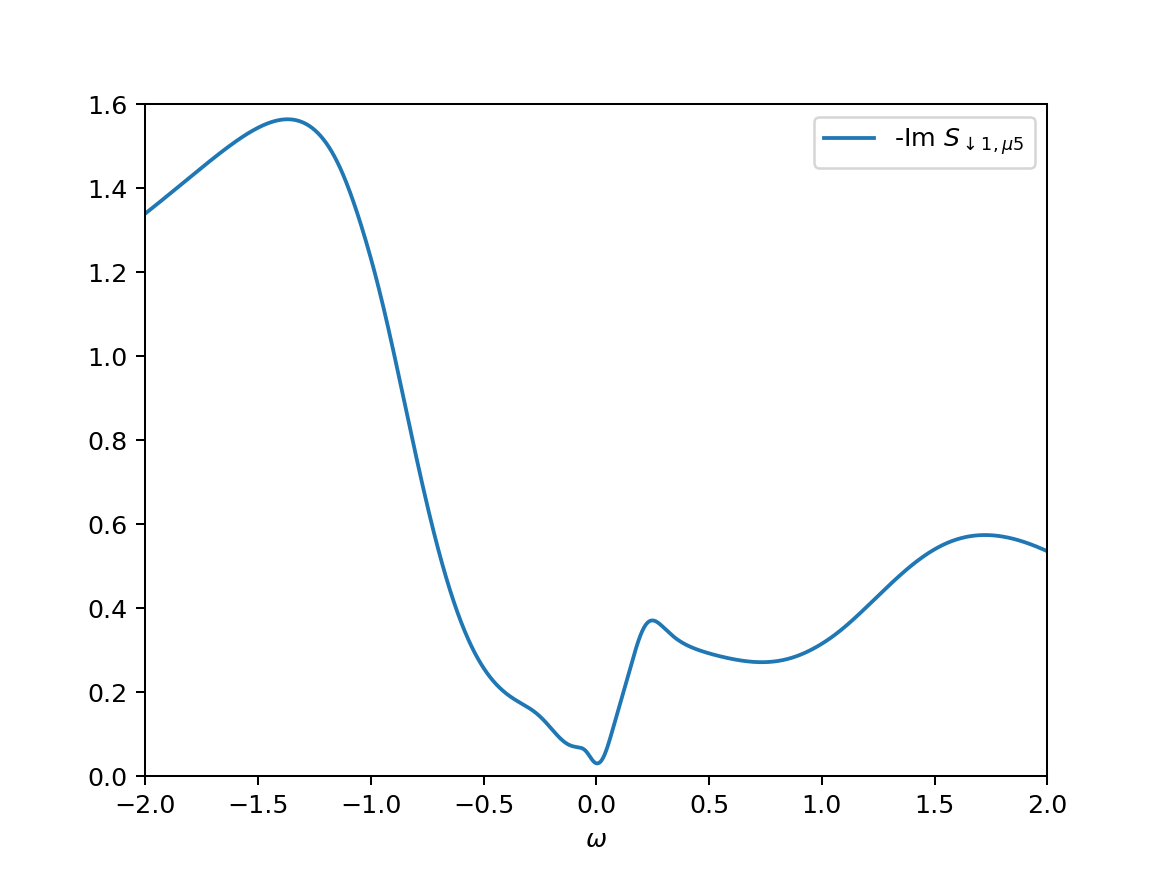

<IPython.core.display.Javascript object>


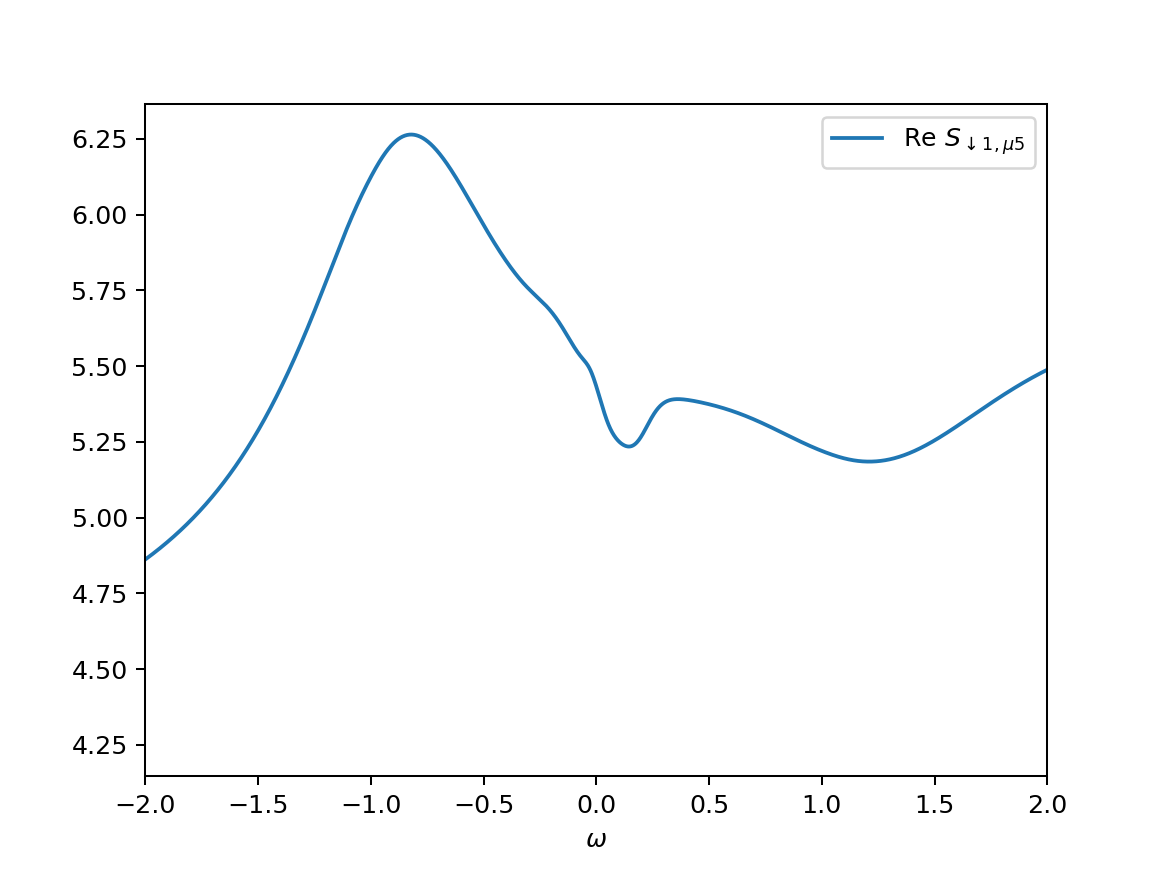

Text(0,0.5,'')

In [8]:
plt.figure(1)
oplot(-S_mu5_down_1.imag, label="-Im $S_{\downarrow 1, \mu5}$")
plt.xlim([-2,2])
plt.ylim([0,1.6])
plt.ylabel('')
plt.figure(2)
oplot(S_mu5_down_1.real, label="Re $S_{\downarrow 1, \mu5}$")
plt.xlim([-2,2])
plt.ylabel('')

Let us check how the result changes with $\mu$:

In [10]:
mu_vals = np.linspace(3,7,num=5)
list_G = []
list_names = []
for mu in mu_vals:
    G = GfImFreq(indices=[0], mesh=S['down_1'].mesh)
    G << inverse(iOmega_n+mu-S['down_1'])
    list_G.append(G)
    list_names.append("mu"+str(mu))

Gmu = BlockGf(name_list=list_names, block_list=list_G)

In [ ]:
GR = OT.compute_GfReFreq(Gmu, comp_grid_params=[0.01, 10], non_uniform_grid=True, interactive_mode=False)

Now we get $\Sigma^R(\omega)$ for each value of $\mu$ and put the result in a *BlockGf* object:

In [12]:
list_SR = []
ind_mu = 0
for bl,Gbl in GR:
    mu = mu_vals[ind_mu]
    ind_mu = ind_mu+1
    Stmp = GfReFreq(indices=[0], mesh=Gbl.mesh)
    Stmp << Omega+mu-inverse(Gbl)
    list_SR.append(Stmp)
S_down_1 = BlockGf(name_list=list_names, block_list=list_SR, name ="$S_^R{\downarrow 1}$")

and we plot the results for all values of $\mu$:

<IPython.core.display.Javascript object>


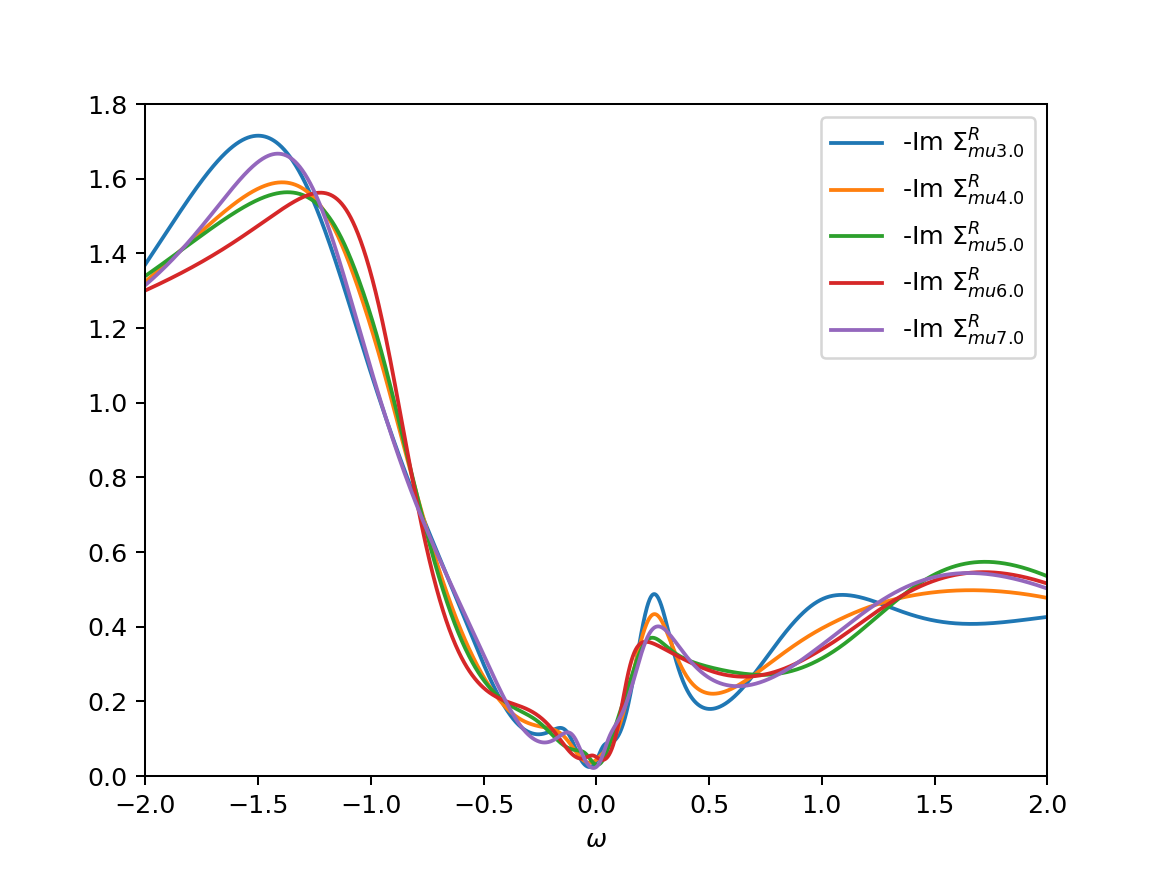

<IPython.core.display.Javascript object>


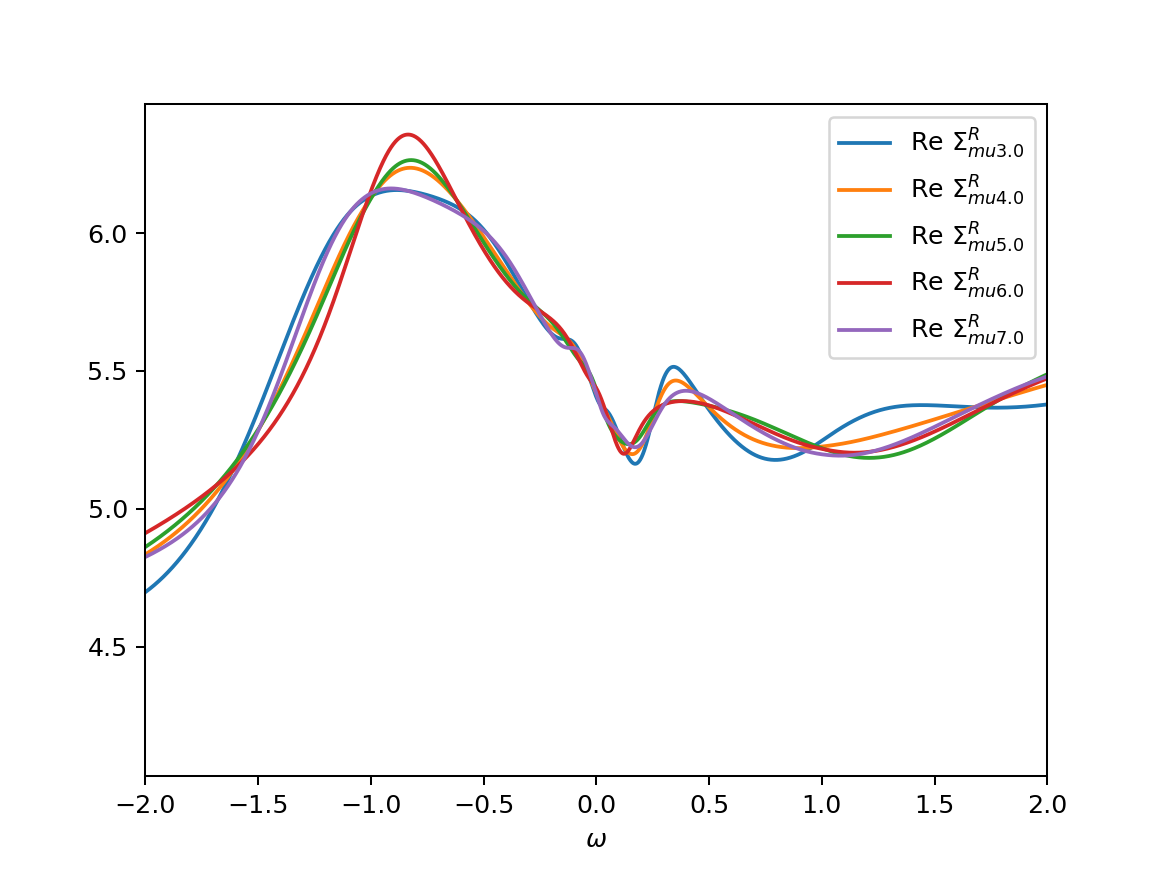

Text(0,0.5,'')

In [13]:
plt.figure(3)
for ind in list_names:
    lbl="-Im $\Sigma^R_{"+ind+"}$"
    oplot(-S_down_1[ind].imag, label=lbl)
plt.xlim([-2,2])
plt.ylim([0,1.8])
plt.legend()
plt.ylabel('')
plt.figure(4)
for ind in list_names:
    lbl="Re $\Sigma^R_{"+ind+"}$"
    oplot(S_down_1[ind].real, label=lbl)
plt.xlim([-2,2])
plt.legend()
plt.ylabel('')

Like for *down_0* we see that the self-energy is relatively stable between $\mu=5$ to $\mu=7$.

As a final exercise we recompute the *down_0* component and compare with *down_1*:

In [ ]:
mu = 5.0
G = GfImFreq(indices=[0], mesh=S['down_0'].mesh)
G << inverse(iOmega_n+mu-S['down_0'])
GR = OT.compute_GfReFreq(G, comp_grid_params=[0.01, 10], non_uniform_grid=True, interactive_mode=False)
S_mu5_down_0 = GfReFreq(indices=[0], mesh=GR.mesh, name="$S_{\downarrow 0, \mu5}$")
S_mu5_down_0 << Omega+mu-inverse(GR)

<IPython.core.display.Javascript object>


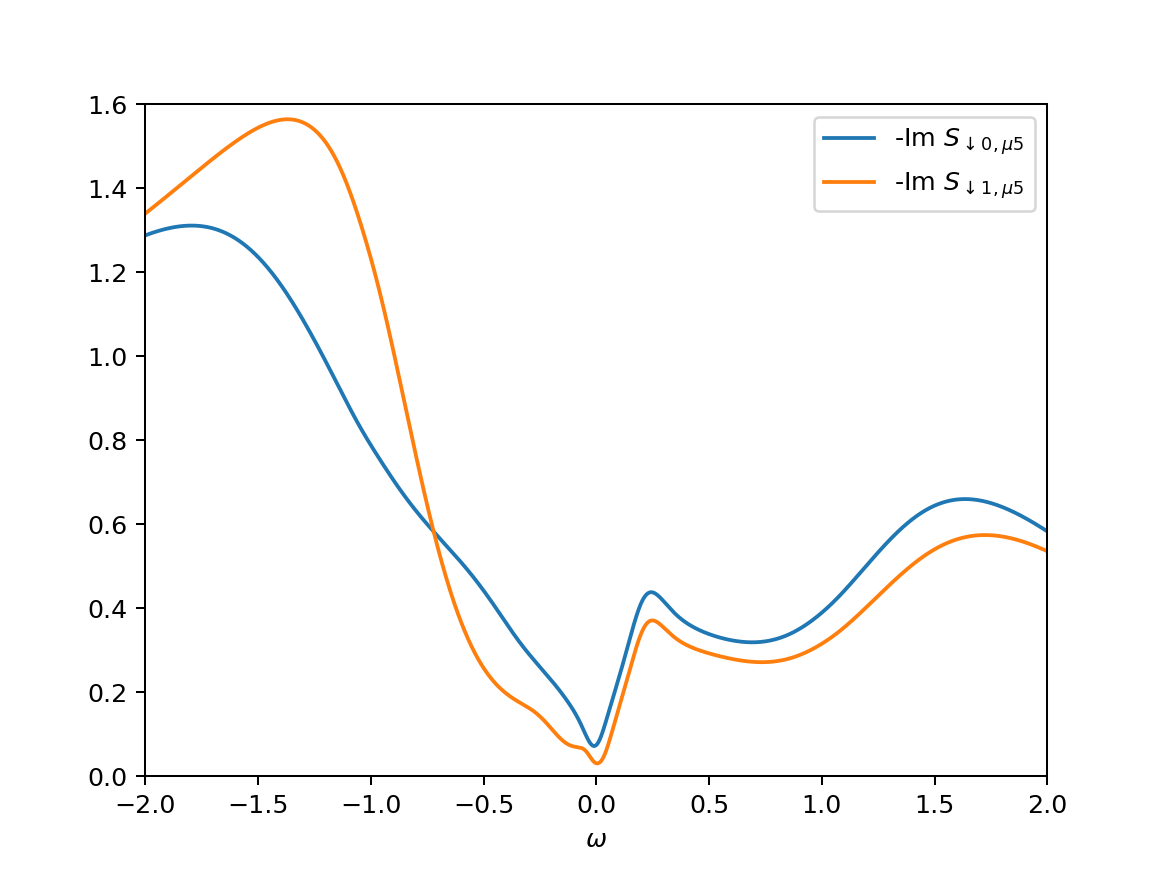

<IPython.core.display.Javascript object>


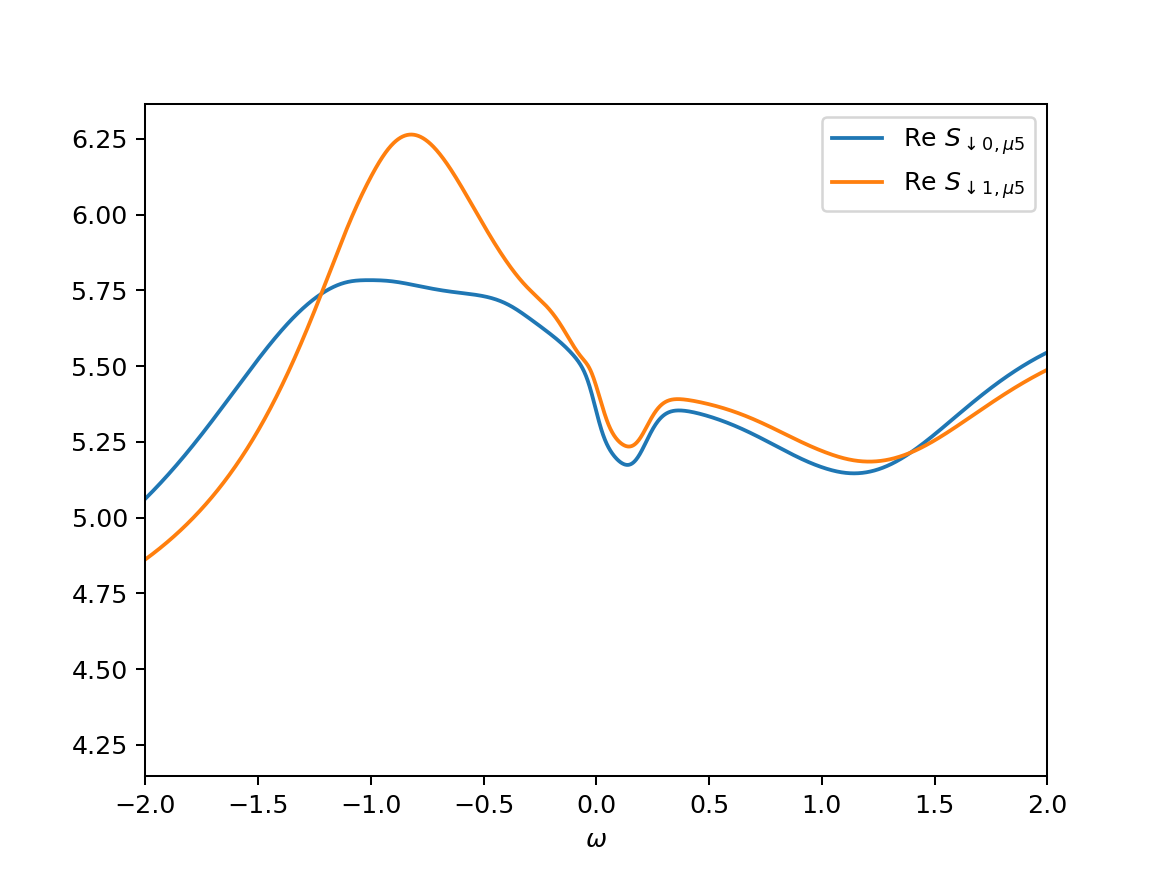

Text(0,0.5,'')

In [15]:
plt.figure(5)
oplot(-S_mu5_down_0.imag, label="-Im $S_{\downarrow 0, \mu5}$")
oplot(-S_mu5_down_1.imag, label="-Im $S_{\downarrow 1, \mu5}$")
plt.xlim([-2,2])
plt.ylim([0,1.6])
plt.ylabel('')
plt.figure(6)
oplot(S_mu5_down_0.real, label="Re $S_{\downarrow 0, \mu5}$")
oplot(S_mu5_down_1.real, label="Re $S_{\downarrow 1, \mu5}$")
plt.xlim([-2,2])
plt.ylabel('')

In [16]:
os.chdir("..")
su.rmtree(output_dir)